## 피마 인디언 당뇨병 예측

In [3]:
import os

os.chdir('/content/drive/MyDrive/아시아경제 Fintech 과정/ML/pima_indian')

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### 데이터 로드

In [6]:
diabetes_data = pd.read_csv('diabetes.csv')

In [7]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<pre>
Pregnancies : 임신횟수
Glucose : 포도당수치
BloodPressure : 혈압
SkinThickness : 피하지방
Insulin : 인슐린
BMI : 체질량지수
DiabetesPedigreeFunction : 당뇨 내력 가중치 값
Age : 나이
Outcome : 당뇨여부 1(당뇨) / 0(정상)

In [10]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
# 평가지표
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred) # 정밀도
  recall = recall_score(y_test, pred) # 재현율
  f1 = f1_score(y_test, pred) # 정밀도와 재현율을 결합한 지표 (두 지표가 어느 한쪽으로 치우치지 않을 때 높은 값을 가짐)
  roc_auc = roc_auc_score(y_test, pred_proba) # FPR이 변할 때 TPR(재현율)이 어떻게 변하는지를 나타내는 곡선 (1에 가까울수록 높은 수치)

  print('오차행렬')
  print(confusion)
  print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}')

In [28]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
  # threshold ndarray와 이 threshold(임계값)에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행 (정밀도는 점섬으로 표시)
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  print("threshold_boundary ", threshold_boundary)
  plt.plot(thresholds, precisions[:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[:threshold_boundary], label='recall')

  # threshold 값 X 축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  # x축, y축 label과 legend 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

### Logistic Regression으로 학습 및 예측 수행

In [19]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
y = diabetes_data['Outcome']
X = diabetes_data.drop('Outcome', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=453)

# 학습, 예측 및 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[93  8]
 [23 30]]
정확도: 0.7987, 정밀도: 0.7895, 재현율: 0.5660, F1: 0.6593, AUC: 0.8631


### precision recall 곡선 그림

threshold_boundary  109


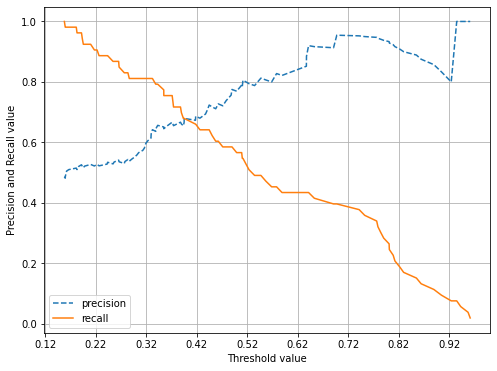

In [29]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

### 각 피처들의 값 4분위 분포 확인

In [30]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0이 나올 수 없는 피처가 몇개 보인다



```
# 코드로 형식 지정됨
```

### Glucose(포도당) 피처의 분포도

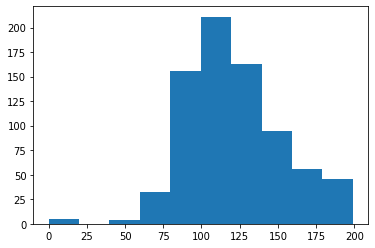

In [34]:
plt.hist(diabetes_data['Glucose'], bins=10)
plt.show()

### 0값이 있는 피처들에서 0값의 데이터 건수와 퍼센트 계산

In [40]:
# 0값을 검사할 피처들
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data.shape[0]

# 0값의 건수와 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
  print(f'{feature}의 0 건수는 {zero_count}개, 퍼센트는 {zero_count/total_count*100:.2f}%')

Glucose의 0 건수는 5개, 퍼센트는 0.65%
BloodPressure의 0 건수는 35개, 퍼센트는 4.56%
SkinThickness의 0 건수는 227개, 퍼센트는 29.56%
Insulin의 0 건수는 374개, 퍼센트는 48.70%
BMI의 0 건수는 11개, 퍼센트는 1.43%


### 0값을 평균값으로 대체

In [43]:
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

In [44]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 0값 대체 + 스케일링 후 학습/예측

In [46]:
y = diabetes_data['Outcome']
X = diabetes_data.drop('Outcome', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=453)

# 학습, 예측 및 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[92  9]
 [22 31]]
정확도: 0.7987, 정밀도: 0.7750, 재현율: 0.5849, F1: 0.6667, AUC: 0.8562


재현율이 0.5660 -> 0.5849 약 0.02 증가

### 분류결정 임곗값을 변경하면서 성능 측정

<pre>
Binarizer
연속형 변수를 특정 기준값 이하(equal or less the threshold)이면 '0',
특정 기준값 초과(above the threshold)이면 '1'의 두 개의 값만을 가지는 변수로 변환
</pre>

In [47]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값: ', custom_threshold)
    get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [49]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1], thresholds)

ValueError: ignored

#### 머신러닝 모델은 2차원 배열을 입력값으로 기대하기 때문에 reshape을 통해 2차원 배열로 변환한 뒤 넘겨줘야 한다!!!!!!!!!!!

In [50]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값:  0.3
오차행렬
[[73 28]
 [11 42]]
정확도: 0.7468, 정밀도: 0.6000, 재현율: 0.7925, F1: 0.6829, AUC: 0.8562
임곗값:  0.33
오차행렬
[[77 24]
 [13 40]]
정확도: 0.7597, 정밀도: 0.6250, 재현율: 0.7547, F1: 0.6838, AUC: 0.8562
임곗값:  0.36
오차행렬
[[80 21]
 [13 40]]
정확도: 0.7792, 정밀도: 0.6557, 재현율: 0.7547, F1: 0.7018, AUC: 0.8562
임곗값:  0.39
오차행렬
[[85 16]
 [17 36]]
정확도: 0.7857, 정밀도: 0.6923, 재현율: 0.6792, F1: 0.6857, AUC: 0.8562
임곗값:  0.42
오차행렬
[[86 15]
 [19 34]]
정확도: 0.7792, 정밀도: 0.6939, 재현율: 0.6415, F1: 0.6667, AUC: 0.8562
임곗값:  0.45
오차행렬
[[88 13]
 [20 33]]
정확도: 0.7857, 정밀도: 0.7174, 재현율: 0.6226, F1: 0.6667, AUC: 0.8562
임곗값:  0.48
오차행렬
[[91 10]
 [21 32]]
정확도: 0.7987, 정밀도: 0.7619, 재현율: 0.6038, F1: 0.6737, AUC: 0.8562
임곗값:  0.5
오차행렬
[[92  9]
 [22 31]]
정확도: 0.7987, 정밀도: 0.7750, 재현율: 0.5849, F1: 0.6667, AUC: 0.8562


In [53]:
# 임곗값을 0.39로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.39)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer 변환
pred_th_039 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1))

get_clf_eval(y_test, pred_th_039, pred_proba[:, 1])

오차행렬
[[85 16]
 [17 36]]
정확도: 0.7857, 정밀도: 0.6923, 재현율: 0.6792, F1: 0.6857, AUC: 0.8562
